In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
dt= pd.read_csv('Data.csv',index_col='time',parse_dates=True)
dt.index = pd.to_datetime(dt.index)

/tmp/ipython-input-1082967747.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt= pd.read_csv('Data.csv',index_col='time',parse_dates=True)


In [4]:
dt2= pd.read_csv('Data_2.csv',index_col='Timestamp',parse_dates=True)
dt2.index = pd.to_datetime(dt2.index)

/tmp/ipython-input-1503883812.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt2= pd.read_csv('Data_2.csv',index_col='Timestamp',parse_dates=True)


<Axes: xlabel='time'>

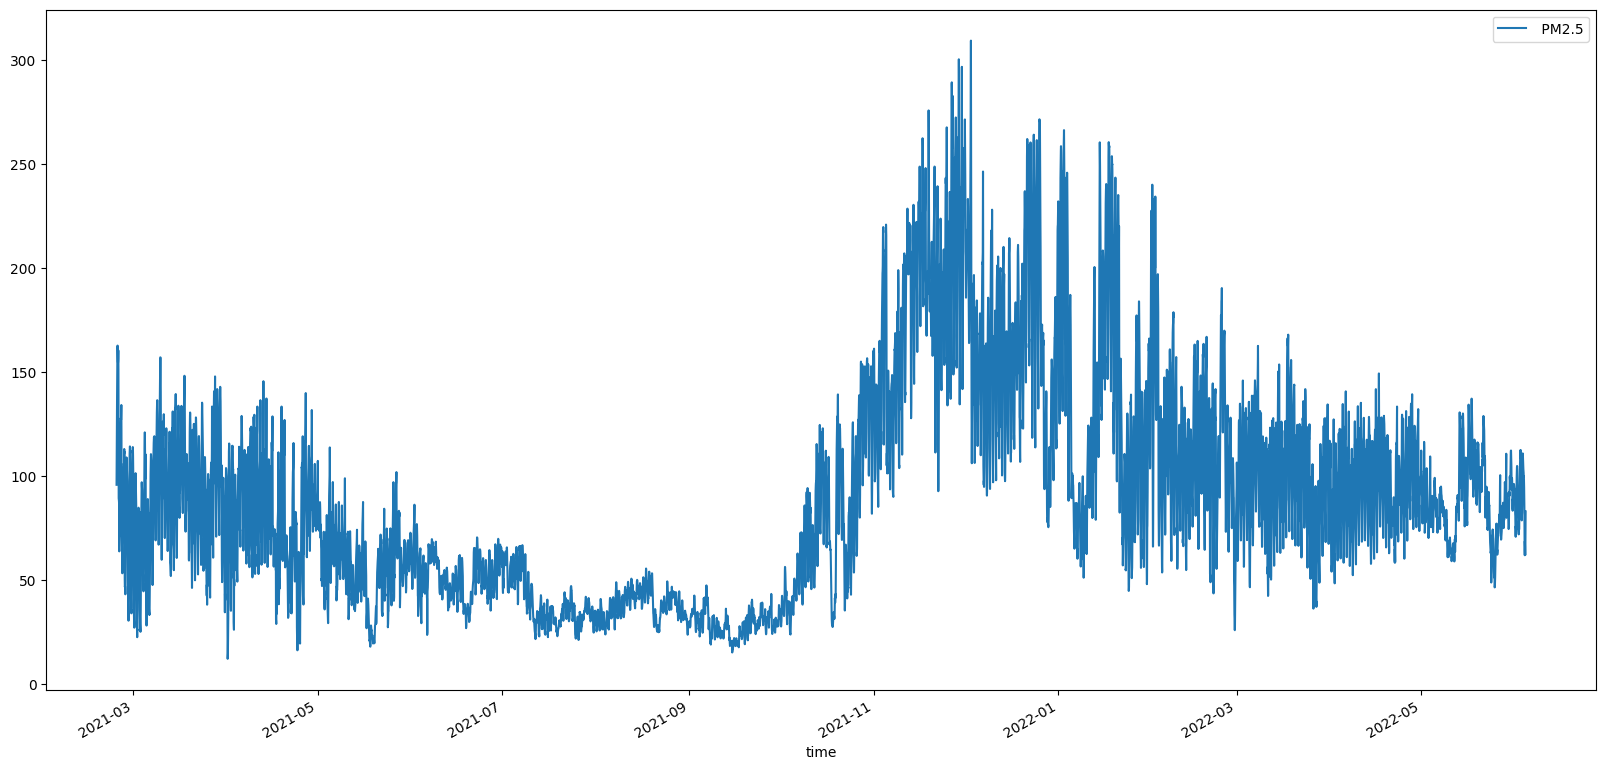

In [5]:
dt.plot(figsize=(20,10))

<Axes: xlabel='Timestamp'>

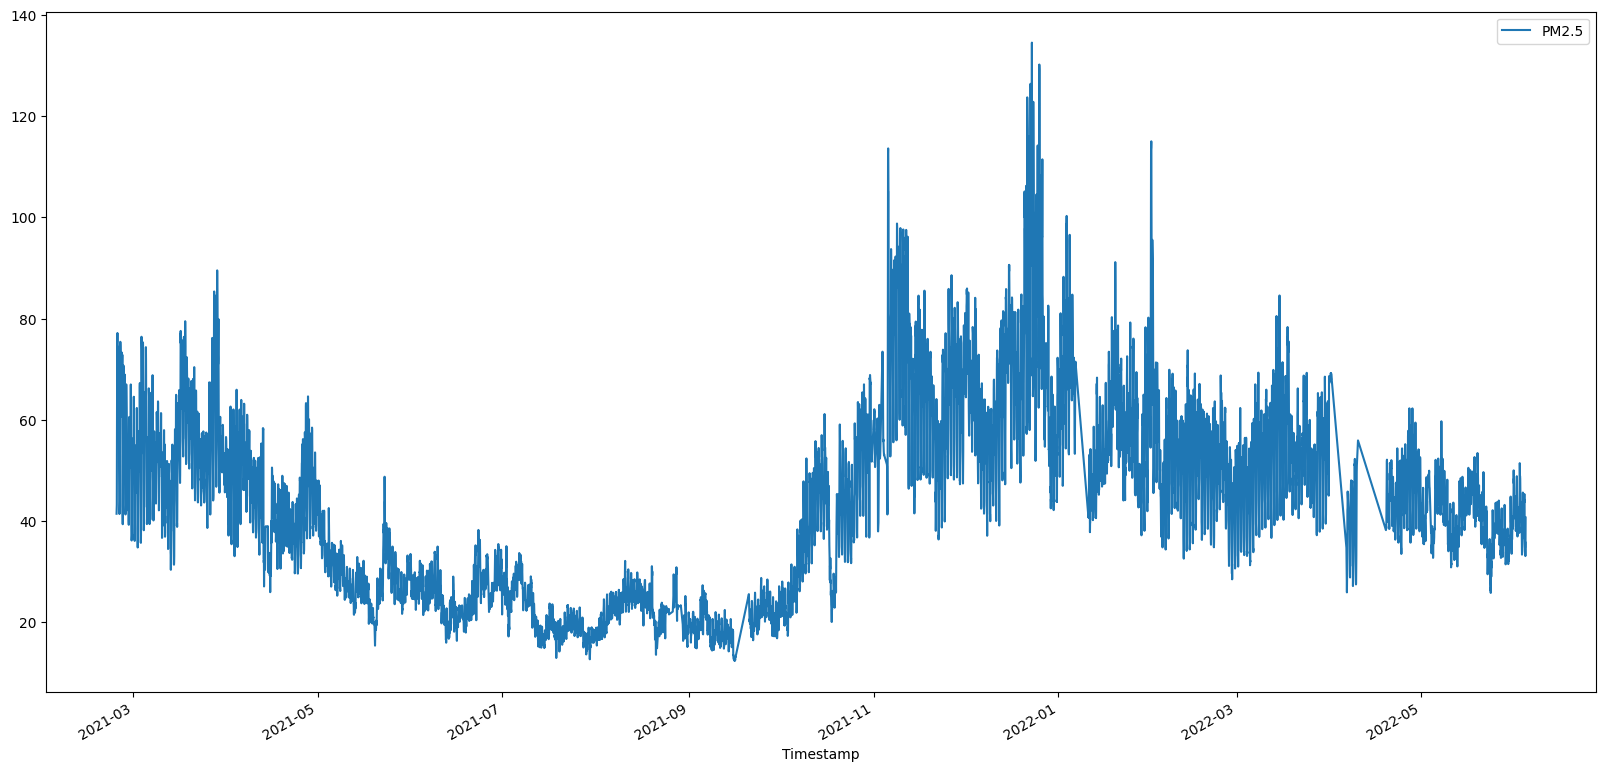

In [6]:
dt2.plot(figsize=(20,10))

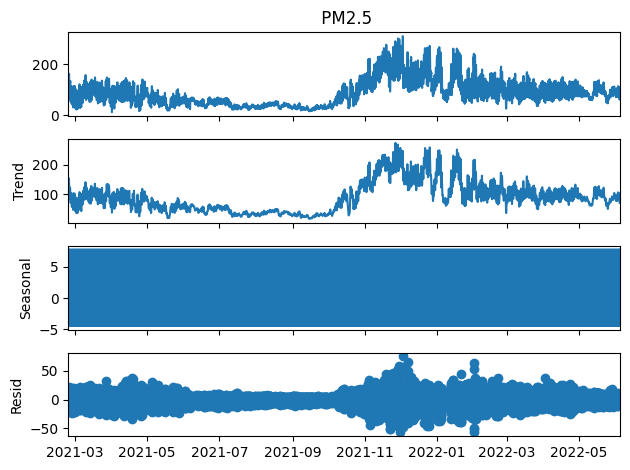

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
dt_cleaned = dt.dropna()
results = seasonal_decompose(dt_cleaned[dt_cleaned.columns[0]],period = 12)
results.plot();

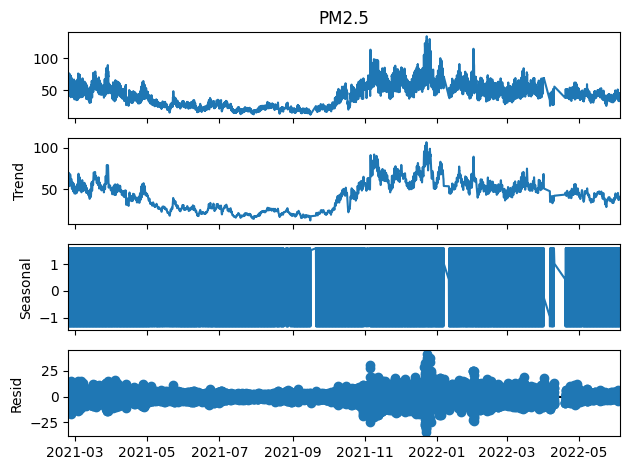

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
dt_cleaned2 = dt2.dropna()
results2 = seasonal_decompose(dt_cleaned2[dt_cleaned2.columns[0]],period = 12)
results2.plot();

In [9]:
dt.info()
dt2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11188 entries, 2021-02-23 12:30:00 to 2022-06-04 15:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    PM2.5  11188 non-null  float64
dtypes: float64(1)
memory usage: 174.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10193 entries, 2021-02-23 12:00:00 to 2022-06-04 15:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   10193 non-null  float64
dtypes: float64(1)
memory usage: 159.3 KB


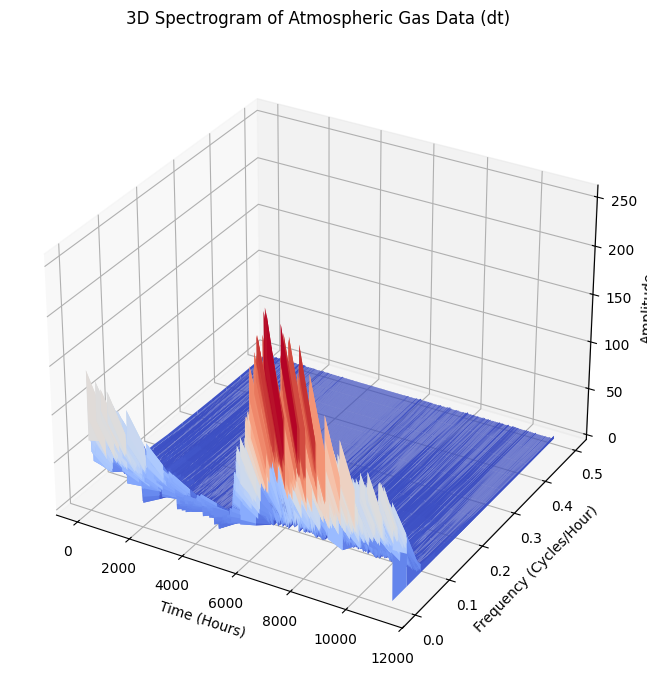

In [10]:
from scipy import signal
time_series = dt[dt.columns[0]].values
fs = 1
frequencies, times, Zxx = signal.stft(time_series, fs=fs, nperseg=24)
times_grid, frequencies_grid = np.meshgrid(times, frequencies)
amplitude = np.abs(Zxx)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(times_grid, frequencies_grid, amplitude,
                cmap=plt.cm.coolwarm, rstride=1, cstride=1)

ax.set_title('3D Spectrogram of Atmospheric Gas Data (dt)', pad=20)
ax.set_xlabel('Time (Hours)')
ax.set_ylabel('Frequency (Cycles/Hour)')
ax.set_zlabel('Amplitude')

plt.show()

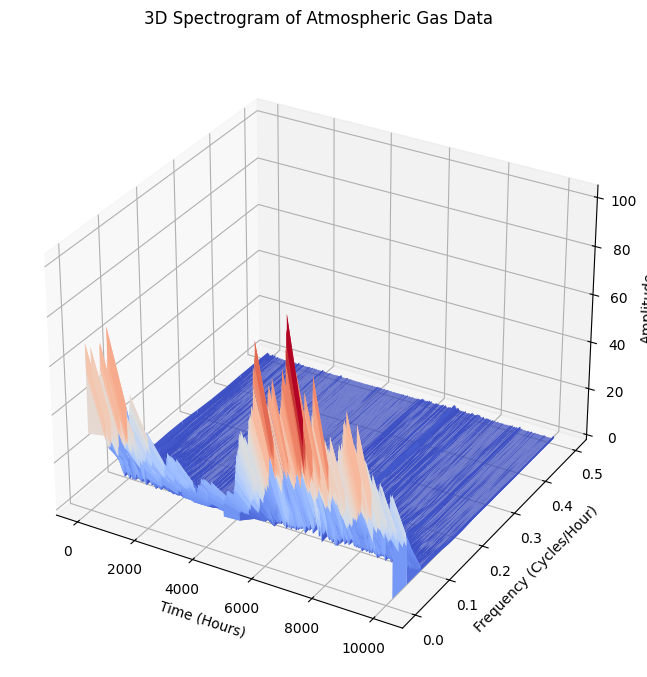

In [11]:
from scipy import signal
time_series = dt2[dt2.columns[0]].values
fs = 1
frequencies, times, Zxx = signal.stft(time_series, fs=fs, nperseg=24)
times_grid, frequencies_grid = np.meshgrid(times, frequencies)
amplitude = np.abs(Zxx)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(times_grid, frequencies_grid, amplitude,
                cmap=plt.cm.coolwarm, rstride=1, cstride=1)

ax.set_title('3D Spectrogram of Atmospheric Gas Data', pad=20)
ax.set_xlabel('Time (Hours)')
ax.set_ylabel('Frequency (Cycles/Hour)')
ax.set_zlabel('Amplitude')

plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(dt_cleaned[dt_cleaned.columns[0]])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))
if adf_test[1] <= 0.05:
    print("Reject the null hypothesis (H0), the time series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0), the time series is non-stationary.")

ADF Statistic: -3.498769
p-value: 0.008019
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject the null hypothesis (H0), the time series is stationary.


In [13]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(dt_cleaned2[dt_cleaned2.columns[0]])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))
if adf_test[1] <= 0.05:
    print("Reject the null hypothesis (H0), the time series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0), the time series is non-stationary.")

ADF Statistic: -3.232320
p-value: 0.018188
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject the null hypothesis (H0), the time series is stationary.


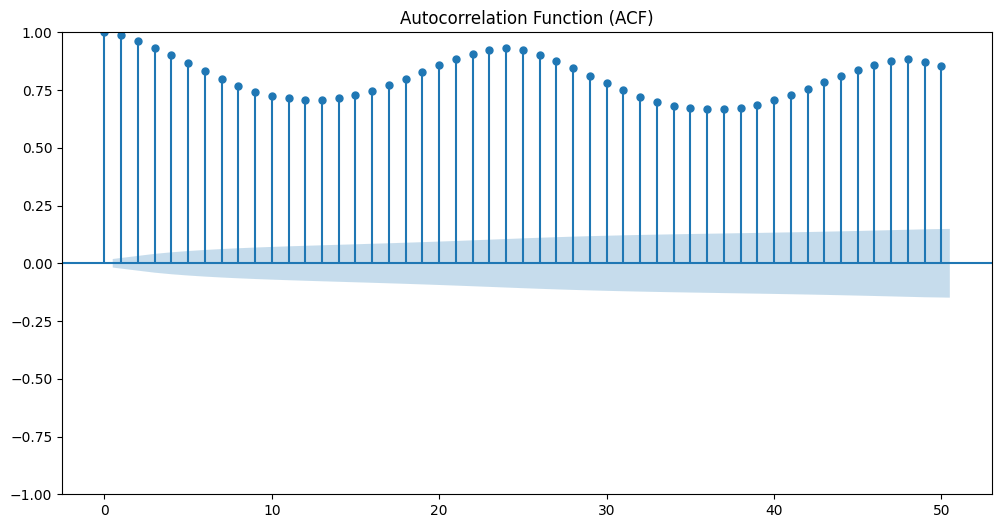

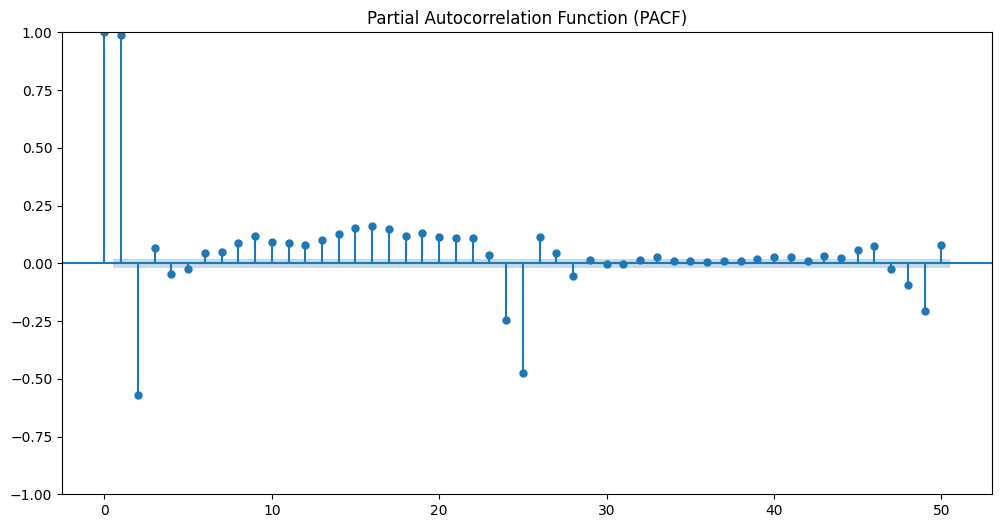

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#autocorrelation function (ACF)
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(dt_cleaned[dt_cleaned.columns[0]], ax=ax, lags=50)
ax.set_title('Autocorrelation Function (ACF)')
plt.show()
# partial autocorrelation function (PACF)
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(dt_cleaned[dt_cleaned.columns[0]], ax=ax, lags=50)
ax.set_title('Partial Autocorrelation Function (PACF)')
plt.show()

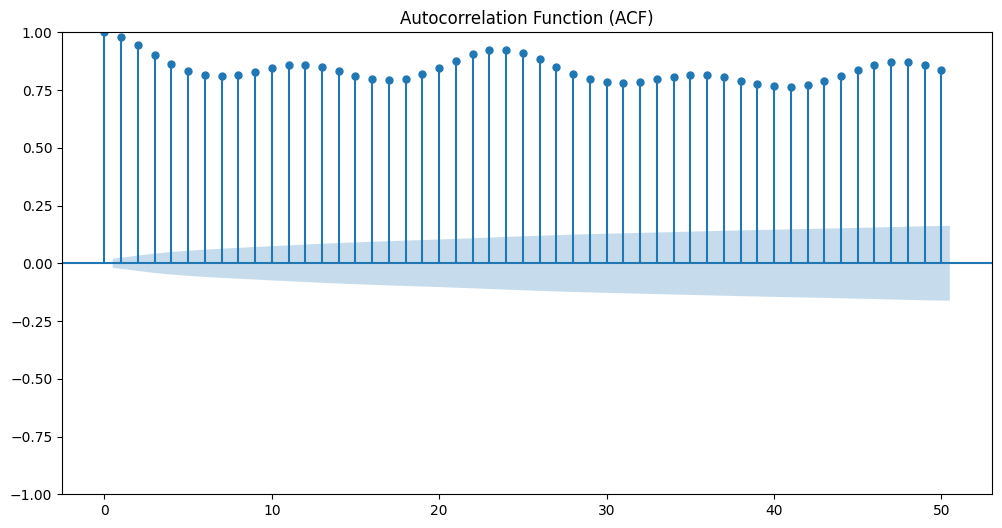

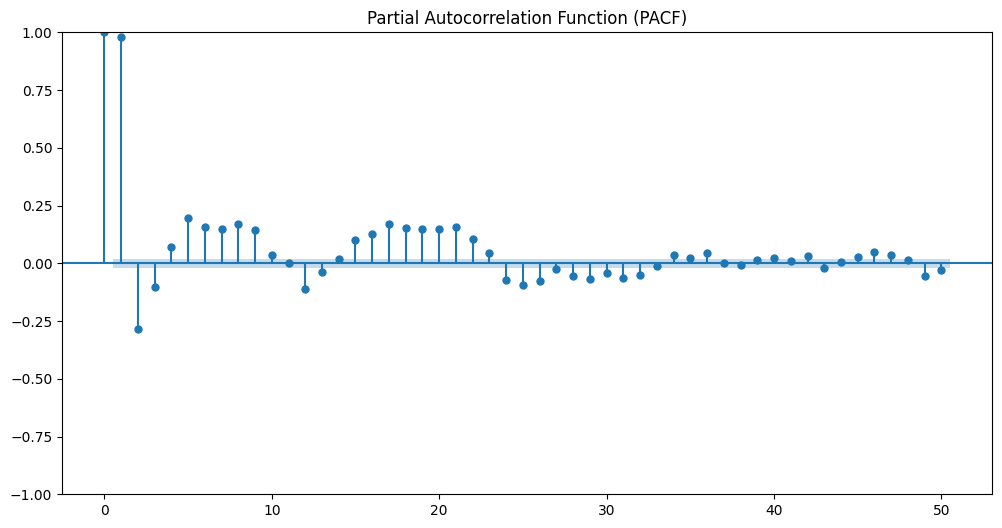

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#autocorrelation function (ACF)
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(dt_cleaned2[dt_cleaned2.columns[0]], ax=ax, lags=50)
ax.set_title('Autocorrelation Function (ACF)')
plt.show()
# partial autocorrelation function (PACF)
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(dt_cleaned2[dt_cleaned2.columns[0]], ax=ax, lags=50)
ax.set_title('Partial Autocorrelation Function (PACF)')
plt.show()

### Model Creation

In [ ]:
import os
from datetime import datetime
from google.colab import files
import shutil

In [15]:
def load_data(path):
    df = pd.read_csv(path)
    if ' PM2.5' in df.columns:
        data = df[' PM2.5'].values.flatten()
    elif 'PM2.5' in df.columns:
         data = df['PM2.5'].values.flatten()
    else:
        print(f"Warning: ' PM2.5' or 'PM2.5' not found in {path}. Assuming data is in the second column.")
        data = df.iloc[:, 1].values.flatten()
    scaler = MinMaxScaler((-1, 1))
    data = scaler.fit_transform(data.reshape(-1, 1)).flatten()
    return data, scaler

seq_len = 64
batch_size = 32

data_A, _ = load_data("Data.csv")
data_B, _ = load_data("Data_2.csv")

In [16]:
def create_sequences(data, seq_len):
    return np.array([data[i:i+seq_len] for i in range(len(data)-seq_len)])

A_seq = create_sequences(data_A, seq_len)
B_seq = create_sequences(data_B, seq_len)

dataset_A = tf.data.Dataset.from_tensor_slices(A_seq).shuffle(1000).batch(batch_size, drop_remainder=True)
dataset_B = tf.data.Dataset.from_tensor_slices(B_seq).shuffle(1000).batch(batch_size, drop_remainder=True)

In [17]:
def build_generator():
    model = tf.keras.Sequential([
        layers.Input(shape=(seq_len, 1)),
        layers.Conv1D(64, 7, padding='same', activation='relu'),
        layers.Conv1D(128, 7, padding='same', activation='relu'),
        layers.Conv1D(1, 7, padding='same', activation='tanh')
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.Input(shape=(seq_len, 1)),
        layers.Conv1D(64, 7, strides=2, padding='same'),
        layers.LeakyReLU(0.2),
        layers.Conv1D(128, 7, strides=2, padding='same'),
        layers.LeakyReLU(0.2),
        layers.Conv1D(1, 7, padding='same')
    ])
    return model

G_AB = build_generator()  # A → B
G_BA = build_generator()  # B → A
D_A = build_discriminator()
D_B = build_discriminator()

In [18]:
loss_obj = tf.keras.losses.MeanSquaredError()
cycle_loss_fn = tf.keras.losses.MeanAbsoluteError()

gen_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
disc_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

lambda_cycle = 10.0

In [19]:
@tf.function
def train_step(real_A, real_B):
    with tf.GradientTape(persistent=True) as tape:
        # Generator forward
        fake_B = G_AB(real_A, training=True)
        cycled_A = G_BA(fake_B, training=True)

        fake_A = G_BA(real_B, training=True)
        cycled_B = G_AB(fake_A, training=True)

        # Discriminator predictions
        disc_real_A = D_A(real_A, training=True)
        disc_real_B = D_B(real_B, training=True)
        disc_fake_A = D_A(fake_A, training=True)
        disc_fake_B = D_B(fake_B, training=True)

        # Generator adversarial losses
        valid = tf.ones_like(disc_fake_A)
        fake = tf.zeros_like(disc_fake_A)

        gen_GAN_A2B = loss_obj(valid, disc_fake_B)
        gen_GAN_B2A = loss_obj(valid, disc_fake_A)

        # Cycle consistency losses
        cycle_A_loss = cycle_loss_fn(real_A, cycled_A)
        cycle_B_loss = cycle_loss_fn(real_B, cycled_B)
        total_cycle_loss = cycle_A_loss + cycle_B_loss

        # Total generator loss
        total_gen_loss = gen_GAN_A2B + gen_GAN_B2A + lambda_cycle * total_cycle_loss

        # Discriminator losses
        disc_A_loss = (loss_obj(valid, disc_real_A) + loss_obj(fake, disc_fake_A)) * 0.5
        disc_B_loss = (loss_obj(valid, disc_real_B) + loss_obj(fake, disc_fake_B)) * 0.5
        total_disc_loss = disc_A_loss + disc_B_loss

    # Apply gradients
    gen_grads = tape.gradient(total_gen_loss, G_AB.trainable_variables + G_BA.trainable_variables)
    disc_grads = tape.gradient(total_disc_loss, D_A.trainable_variables + D_B.trainable_variables)
    gen_optimizer.apply_gradients(zip(gen_grads, G_AB.trainable_variables + G_BA.trainable_variables))
    disc_optimizer.apply_gradients(zip(disc_grads, D_A.trainable_variables + D_B.trainable_variables))

    return total_gen_loss, total_disc_loss, total_cycle_loss


In [20]:
epochs = 100
for epoch in range(epochs):
    total_G, total_D, total_C = 0.0, 0.0, 0.0
    steps = 0

    for real_A, real_B in zip(dataset_A, dataset_B):
        real_A = tf.expand_dims(real_A, -1)
        real_B = tf.expand_dims(real_B, -1)

        g_loss, d_loss, c_loss = train_step(real_A, real_B)
        total_G += float(g_loss.numpy())
        total_D += float(d_loss.numpy())
        total_C += float(c_loss.numpy())
        steps += 1

    avg_G = total_G / steps
    avg_D = total_D / steps
    avg_C = total_C / steps
    print(f"Epoch [{epoch+1}/{epochs}]  G_loss(avg)={avg_G:.4f}  D_loss(avg)={avg_D:.4f}  Cycle_loss(avg)={avg_C:.4f}")

Epoch [1/100]  G_loss(avg)=1.9567  D_loss(avg)=0.4957  Cycle_loss(avg)=0.1284
Epoch [2/100]  G_loss(avg)=1.2692  D_loss(avg)=0.4356  Cycle_loss(avg)=0.0628
Epoch [3/100]  G_loss(avg)=1.2032  D_loss(avg)=0.4330  Cycle_loss(avg)=0.0536
Epoch [4/100]  G_loss(avg)=1.1651  D_loss(avg)=0.4300  Cycle_loss(avg)=0.0477
Epoch [5/100]  G_loss(avg)=1.1196  D_loss(avg)=0.4359  Cycle_loss(avg)=0.0441
Epoch [6/100]  G_loss(avg)=1.0887  D_loss(avg)=0.4349  Cycle_loss(avg)=0.0409
Epoch [7/100]  G_loss(avg)=1.0601  D_loss(avg)=0.4347  Cycle_loss(avg)=0.0381
Epoch [8/100]  G_loss(avg)=1.0376  D_loss(avg)=0.4339  Cycle_loss(avg)=0.0362
Epoch [9/100]  G_loss(avg)=1.0307  D_loss(avg)=0.4312  Cycle_loss(avg)=0.0347
Epoch [10/100]  G_loss(avg)=1.0137  D_loss(avg)=0.4329  Cycle_loss(avg)=0.0333
Epoch [11/100]  G_loss(avg)=1.0047  D_loss(avg)=0.4334  Cycle_loss(avg)=0.0324
Epoch [12/100]  G_loss(avg)=0.9932  D_loss(avg)=0.4328  Cycle_loss(avg)=0.0312
Epoch [13/100]  G_loss(avg)=0.9847  D_loss(avg)=0.4337  Cycle

In [23]:
import os
save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

from datetime import datetime

def visualize_translation_save(G_AB, G_BA, A_seq, B_seq, num_samples=5):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    for i in range(num_samples):
        a_real = A_seq[i:i+1]
        b_real = B_seq[i:i+1]
        a_real = np.expand_dims(a_real, -1)
        b_real = np.expand_dims(b_real, -1)

        fake_B = G_AB(a_real)
        recov_A = G_BA(fake_B)

        fake_A = G_BA(b_real)
        recov_B = G_AB(fake_A)

        a_real_np = a_real[0, :, 0]
        b_real_np = b_real[0, :, 0]
        fake_B_np = fake_B[0, :, 0]
        recov_A_np = recov_A[0, :, 0]
        fake_A_np = fake_A[0, :, 0]
        recov_B_np = recov_B[0, :, 0]


        plt.figure(figsize=(14, 4))
        plt.subplot(1, 3, 1)
        plt.plot(a_real_np, label="Real A")
        plt.plot(fake_B_np, label="Fake B (A→B)")
        plt.plot(recov_A_np, label="Reconstructed A")
        plt.title(f"A→B→A (Sample {i+1})")
        plt.legend()

        plt.subplot(1, 3, 2)
        plt.plot(b_real_np, label="Real B")
        plt.plot(fake_A_np, label="Fake A (B→A)")
        plt.plot(recov_B_np, label="Reconstructed B")
        plt.title(f"B→A→B (Sample {i+1})")
        plt.legend()

        plt.subplot(1, 3, 3)
        plt.plot(a_real_np, label="Reference (A)")
        plt.plot(b_real_np, label="Target (B)")
        plt.title("Original Comparison")
        plt.legend()

        plt.tight_layout()
        filename = os.path.join(save_dir, f"sample_{i+1}_{timestamp}.png")
        plt.savefig(filename, dpi=200)
        plt.close()
        print(f"✅ Saved: {filename}")
visualize_translation_save(G_AB, G_BA, A_seq, B_seq, num_samples=5)

✅ Saved: results/sample_1_20251107_095024.png
✅ Saved: results/sample_2_20251107_095024.png
✅ Saved: results/sample_3_20251107_095024.png
✅ Saved: results/sample_4_20251107_095024.png
✅ Saved: results/sample_5_20251107_095024.png
